In [151]:
import tensorflow as tf
from tensorflow import keras

In [152]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5709139571502075628
]


In [153]:
import csv
import pandas as pd

In [154]:
csv_reader = pd.read_csv('IoT Intrusion Dataset 2020.csv')

In [155]:
csv_reader.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [156]:
csv_reader = csv_reader.drop(['Flow_ID','Label', 'Sub_Cat', 'Timestamp', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port'], axis=1)

In [157]:
csv_reader.head(5)

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai
1,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS
2,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan
3,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai
4,17,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai


In [158]:
print(len(csv_reader.columns))
csv_reader['Cat'] = pd.Categorical(csv_reader['Cat'])
csv_reader['Cat'] = csv_reader.Cat.cat.codes

78


In [159]:
csv_reader.head(5)

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,2
1,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,4
3,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,2
4,17,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,2


In [160]:
target = csv_reader.pop('Cat')


In [161]:
len(pd.unique(target)) 
target

0         2
1         0
2         4
3         2
4         2
         ..
625778    2
625779    0
625780    4
625781    3
625782    2
Name: Cat, Length: 625783, dtype: int8

In [170]:

ys = tf.one_hot(target.values, depth=5)
#print(ys)
dataset = tf.data.Dataset.from_tensor_slices((csv_reader.values, ys))
#print(csv_reader)
#ys.shape
print(ys.shape)

(625783, 5)


In [173]:
from sklearn.model_selection import train_test_split

# Split the generated indices and target values by train_test_split().
# The ratio of target values should be kept in the splitted datasets.
X_train_indices, X_val_indices, y_train_targets, y_val_targets = train_test_split(
    dataset, ys, test_size=0.1, stratify=ys, random_state=53)

print_target_counts(y_train_targets, "Training")
print_target_counts(y_val_targets, "Validation")

TypeError: Singleton array array(<TensorSliceDataset shapes: ((77,), (5,)), types: (tf.float64, tf.float32)>,
      dtype=object) cannot be considered a valid collection.

In [ ]:
x = Dense(1024, activation='relu', name='fc1')(dataset)
x = Dropout(0.2, name='dropout1')(x)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dropout(0.2, name='dropout2')(x)
x = Dense(3, activation='softmax', name='fc3')(x)

model = Model(inputs=input_tweet, outputs=x)

In [149]:

def get_compiled_model():
    model = tf.keras.Sequential([
        #keras.layers.Reshape(target_shape=(1*77,), input_shape=(1,77)),
        keras.layers.Dense(units=256, activation='relu'),
        keras.layers.Dense(units=192, activation='relu'),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=5, activation='softmax')
    ])

    model.compile(optimizer='adam', 
                  loss=tf.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [150]:
model = get_compiled_model()
#model.summary()
model.fit(dataset, epochs=15)

Epoch 1/15


ValueError: in user code:

    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\ahrip\anaconda3\envs\3dmot\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_32 is incompatible with the layer: expected axis -1 of input shape to have value 77 but received input with shape (77, 1)


In [88]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               19968     
_________________________________________________________________
dense_61 (Dense)             (None, 192)               49344     
_________________________________________________________________
dense_62 (Dense)             (None, 128)               24704     
_________________________________________________________________
dense_63 (Dense)             (None, 5)                 645       
Total params: 94,661
Trainable params: 94,661
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

In [10]:
from PIL import Image
import numpy as np

x_train[0].shape


(28, 28)

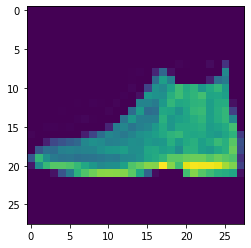

In [11]:
%matplotlib inline 
from matplotlib import pyplot as plt

plt.imshow(x_val[0], interpolation='nearest')
plt.show()

In [12]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)

    return x, y

def create_dataset(xs, ys, n_classes=10):
    ys = tf.one_hot(ys, depth=n_classes)
    return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [13]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

In [15]:
history=model.fit(train_dataset.repeat(),
                  epochs=10, 
                  steps_per_epoch=500, 
                  validation_data=val_dataset.repeat(),
                  validation_steps=2)

Epoch 1/10
500/500 [==============================] - 2s 4ms/step - loss: 1.5917 - accuracy: 0.8691 - val_loss: 1.6208 - val_accuracy: 0.8398
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 1.5859 - accuracy: 0.8749 - val_loss: 1.5887 - val_accuracy: 0.8711
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 1.5845 - accuracy: 0.8760 - val_loss: 1.5999 - val_accuracy: 0.8633
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 1.5849 - accuracy: 0.8761 - val_loss: 1.5983 - val_accuracy: 0.8633
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 1.5827 - accuracy: 0.8781 - val_loss: 1.5967 - val_accuracy: 0.8633
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 1.5803 - accuracy: 0.8806 - val_loss: 1.5957 - val_accuracy: 0.8633
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 1.5815 - accuracy: 0.8791 - val_loss: 1.5887 - val_accuracy: 0.8711
Epoch 

In [16]:
predictions = model.predict(val_dataset)

In [17]:
predictions

array([[5.4063008e-22, 9.3319800e-24, 4.4074967e-30, ..., 1.0000000e+00,
        3.2472009e-19, 1.1080130e-25],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.5612370e-37, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.6751026e-27, 4.3874438e-33, 2.1219486e-37, ..., 4.0897875e-30,
        1.0000000e+00, 3.9677360e-32],
       [3.4322991e-23, 5.6723765e-28, 4.6608631e-21, ..., 3.8661330e-34,
        1.0776715e-22, 1.6994837e-27],
       [7.5411677e-32, 3.6402457e-34, 1.0961348e-28, ..., 0.0000000e+00,
        2.6996779e-32, 0.0000000e+00]], dtype=float32)

In [22]:
import numpy as np
np.argmax(predictions[0])

7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


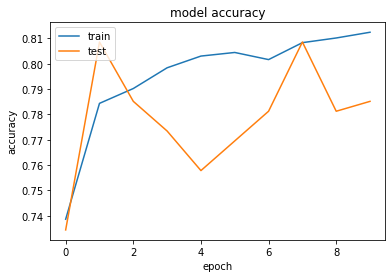

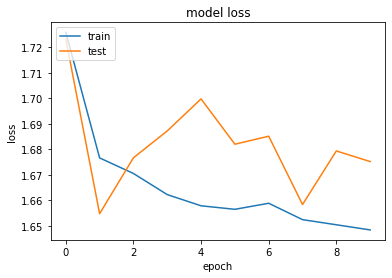

In [23]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()